<h1><center>Laboratorio 4: Spark y EDA</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Lucas Carrasco.
- Nombre de alumno 2: Nicolás Herrera Miranda.



### **Link de repositorio de GitHub:** [Repositorio](https://github.com/vspartamo/MDS7202)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo y análisis de grandes volúmenes de datos por medio de la libreria `pyspark`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

## 1. Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

1. Apache Spark es un sistema de procesamiento de datos a gran escala open source. Dada su trabajo de forma distribuida, la principal ventaja de Spark frente a Pandas es su velocidad y capacidad de trabajar con grandes volúmenes de datos.

2. Un RDD es una colección de objetos distribuidos e inmutables que sufren operaciones en paralelo. Sus principales características son las dependencias (que le permiten reconstruir el RDD original, así siendo solido ante fallos), las particiones (que permiten paralelizar y hacer más eficiente el trabajo) y el computo de funciones (toma una partición específica y devuelve un iterador de los elementos procesados).

3. - Las transformaciones son operaciones que generan un nuevo dataframe a partir de uno ya existente sin modificar el original (pues, en Spark estos son inmutables). Ejemplos de transformaciones son la función **map**, **filter** y **groupby**.
   - Las acciones son operaciones que desencadenan la ejecución de todas las transformaciones que hasta entonces se encontraban organizadas y almacenadas internamente. Es por esto que ejecutar una acción conlleva una cantidad de tiempo mayor a una transformación. Ejemplos de acciones son **count**, **take** y **show**.

4. El particionamiento de datos es fundamental en el funcionamiento de Spark, ya que es una herramienta para lograr el paralelismo, que consiste en ejecutar distintas operaciones de manera simultanea (en paralelo). Al distribuir los datos en particiones se facilita que los executors de Spark procesen datos que se encuentren almacenados más cerca de ellos (a nivel de hardware), lo que reduce el ancho de banda necesario para su transporte. Esto, en suma, conlleva a que a cada núcleo se le asigne alguna partición específica sobre la cual operar.

5. Spark Driver coordina el proceso de ejecución, gestiona el flujo de datos y el control de tareas, mientras que Spark Executors realizan el procesamiento de datos y ejecutan las tareas asignadas por el Driver, almacenando resultados intermedios en la memoria o en disco.

6. Catalyst es un optimizador enfocado en procesar las consultas SQL hechas en Spark, lo cuál lo realiza mediante 4 etapas de optimización. La primera de ellas es el **Análisis**, que consiste en la creación de un Árbol de Sintaxis Abstracta (AST) que examina la estructura de las tablar y las operaciones solicitadas en la consulta. Segundo, esta la **Optimización lógica** que consiste en generar planes de ejecución posibles, en donde el enfoque está en optimizar la consulta desde un punto de vista lógico para mejorar la eficiencia. Tercero, está la **Planificación Física** que consiste en basarse en el plan lógico para lego seleccionar los operadores físicos específicos que se utilizarán para ejecutar la consulta en el motor de Spark. Cuarto y último, está la **Generación de Código** que produce el código de Java optimizado para ser ejecutado en cada nodo del clúster, que tiene enfoque en garantizar una ejecución eficiente y distribuida..



## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=075a9087970c259f5a949479e0d81816e43393e6ed5d787dc0d0eb821442565d
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [3]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType, BooleanType

In [4]:
!pip install --upgrade plotly
!pip install missingno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [5]:
#Libreria para plotear
import matplotlib.pyplot as plt
import plotly.express as px

Cargue los datos usando **pyspark**

> Nota: Puede ser util el siguiente [enlace](https://www.oracle.com/cl/java/technologies/downloads/#jdk22-windows)

In [7]:
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext

# Inicializo el Spark Session
spark = SparkSession.builder.config(conf=SparkConf().setMaster("local").setAppName("Lab4")).getOrCreate()
df = spark.read.parquet("datos_lab_spark.parquet")

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Cree una función **cast_columns** que permita cambiar el tipo de datos de las columnas problemáticas. Luego utilice esta función respecto a lo respondido en la pregunta anterior.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [8]:
df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [9]:
df.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

In [10]:
df.sample(fraction=0.05).show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|  Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|2d7299de-355b-479...|024257c3-5671-4de...|            318.14|2021-10-09 00:00:00|   credit card| health & beauty|     4.0|        42.0|               NULL|    desktop|131.141.230.1

In [11]:
df.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

In [12]:
from pyspark.sql.types import IntegerType, BooleanType
def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df


df = cast_columns(df, {
    'Quantity': IntegerType(),
    'Customer Age': IntegerType(),
    'Is An Alien': BooleanType(),
    'Account Age Days': IntegerType(),
    'Transaction Hour': IntegerType()
})
df.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'int'),
 ('Customer Age', 'int'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'boolean'),
 ('Account Age Days', 'int'),
 ('Transaction Hour', 'int')]

In [13]:
from pyspark.sql.functions import col, when, sum
exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]

df.agg(*exprs).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

In [14]:
df = df.na.drop()
df.count()

13388

In [15]:
df = df.dropDuplicates()
df.count()

13388

In [16]:
df.show(5)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+
|8441d125-c6b8-444...|8be8b3cb-1102-42f...|             73.19|2020-07-09 00:00:00|        PayPal|    toys & games|       5|          35|   New Allisonton|     tablet|  43.47.125.63|PSC 8336,

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 4 productos o menos.
  * Compra mayorista: 5 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [17]:
from pyspark.sql.functions import  log, abs, pow, month, avg

df = df.withColumn("Transaction bp", log(48 + abs(pow(col("Transaction Amount"), 36))))


In [18]:
df = df.withColumn("Transaction Month", month(col("Transaction Date")))


In [19]:
df = df.withColumn("Type of purchase",
    when(col("Quantity") <= 4, "Compra minorista")
    .otherwise("Compra mayorista")
)

In [20]:
df.filter((col("Is An Alien") == True) & (col("Type of purchase") == "Compra mayorista")).show()


+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|5c9dc53f-5c17-4df...|

In [21]:
df.groupBy("Is An Alien").count().show()


+-----------+-----+
|Is An Alien|count|
+-----------+-----+
|       true|  688|
|      false|12700|
+-----------+-----+



In [22]:
df.groupBy("Is An Alien").pivot("Payment Method").agg(avg("Transaction Amount")).show()


+-----------+------------------+------------------+------------------+------------------+
|Is An Alien|            PayPal|     bank transfer|       credit card|        debit card|
+-----------+------------------+------------------+------------------+------------------+
|       true|469.51776470588214| 547.6004624277458| 517.7530538922155| 547.1965168539324|
|      false|215.12598584753908|215.15149230285903|206.31122327044054|215.21641883519203|
+-----------+------------------+------------------+------------------+------------------+



### 4. EDA [20 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas** (2 puntos): Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas** (2 puntos por visualización):
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas** (2 puntos por visualización):
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones** (2 puntos por visualización):
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [23]:
import seaborn as sns
import missingno as msno

In [24]:
#conversion del df a formato pandas
pandas_df = df.toPandas()
pandas_df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is An Alien,Account Age Days,Transaction Hour,Transaction bp,Transaction Month,Type of purchase
0,8441d125-c6b8-4441-ade7-8c2afec0823e,8be8b3cb-1102-42f4-82da-81b911248b11,73.19,2020-07-09,PayPal,toys & games,5,35,New Allisonton,tablet,43.47.125.63,"PSC 8336, Box 0269\nAPO AE 66357","PSC 8336, Box 0269\nAPO AE 66357",False,81,6,154.550117,7,Compra mayorista
1,25aaaf63-f8c4-45da-a7dc-7c13c0a64f59,faec099b-02ac-44c0-9ad3-91e0f1290b16,327.76,2024-07-30,PayPal,health & beauty,2,26,Williamshaven,mobile,116.130.75.103,"5096 Howard Ridges\nEast Lisaport, GU 71402","5096 Howard Ridges\nEast Lisaport, GU 71402",False,363,6,208.522139,7,Compra minorista
2,04cf3438-6677-4251-a62a-0fb76b37ed5c,a87dba6b-6f39-4482-9f36-893acbb872b3,142.17,2022-07-16,credit card,home & garden,1,26,Tinaberg,tablet,37.81.126.73,"625 Escobar Lake\nDavidborough, WV 98898","PSC 2598, Box 6239\nAPO AP 01724",False,197,11,178.452847,7,Compra minorista
3,dc12a480-1d0f-48bc-92c5-7b25223483af,88ce4cae-95cd-482d-970c-0aea23f2df79,64.13,2019-08-09,bank transfer,clothing,2,29,Santosbury,tablet,121.38.58.10,"08077 Rojas Pines Suite 303\nHarperchester, GA...","08077 Rojas Pines Suite 303\nHarperchester, GA...",False,318,19,149.792842,8,Compra minorista
4,e551b7d9-9388-4d81-bd34-5aaf30fc6aa1,1add854f-9d94-46dc-8b89-c9a5d8d4eb76,273.13,2021-10-22,PayPal,health & beauty,2,56,East Timothy,mobile,146.110.166.50,"7304 Morgan Manor\nLauraview, MA 50020","7304 Morgan Manor\nLauraview, MA 50020",False,150,19,201.958123,10,Compra minorista


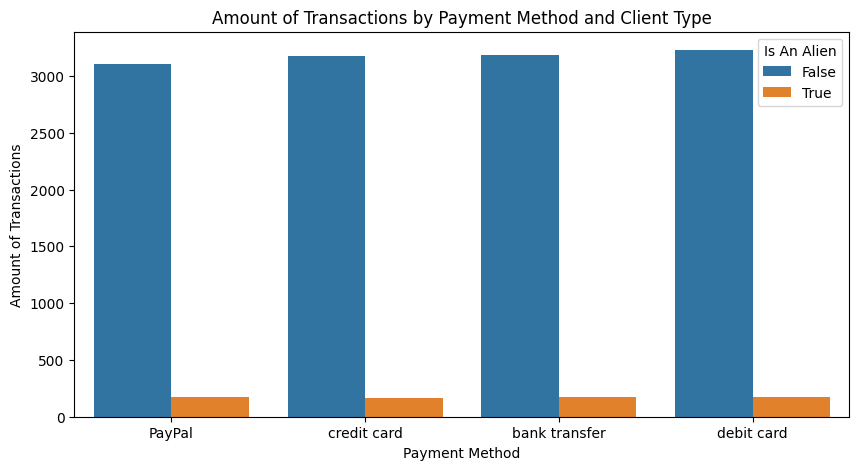

In [25]:
#grafico barras 1
plt.figure(figsize=(10, 5))
sns.countplot(x='Payment Method', hue='Is An Alien', data=pandas_df)
plt.title('Amount of Transactions by Payment Method and Client Type')
plt.ylabel('Amount of Transactions')
plt.show()

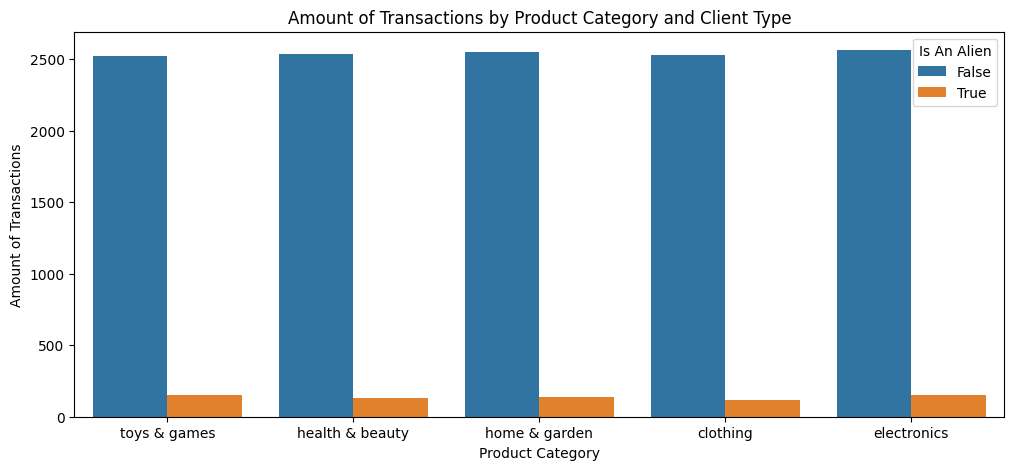

In [26]:
#grafico barras 2
plt.figure(figsize=(12, 5))
sns.countplot(x='Product Category', hue='Is An Alien', data=pandas_df)
plt.title('Amount of Transactions by Product Category and Client Type')
plt.ylabel('Amount of Transactions')
plt.show()

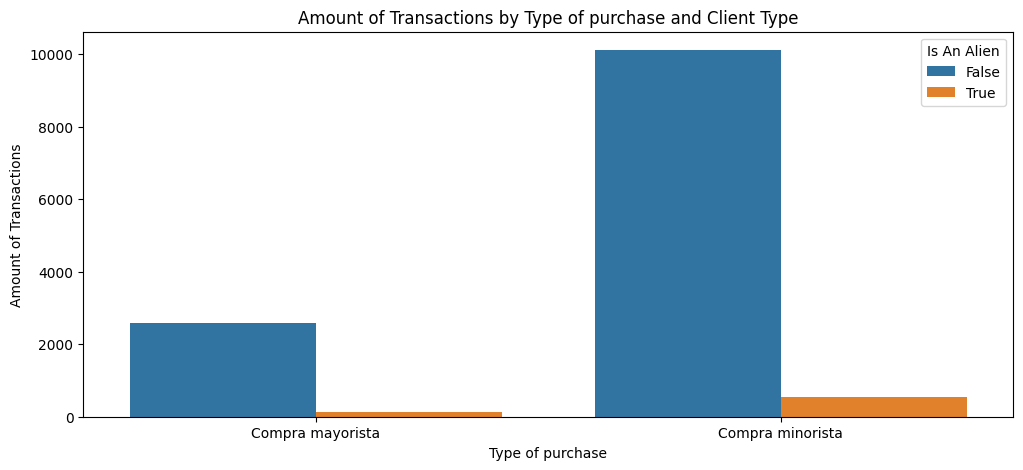

In [27]:
#grafico barras 3
plt.figure(figsize=(12, 5))
sns.countplot(x='Type of purchase', hue='Is An Alien', data=pandas_df)
plt.title('Amount of Transactions by Type of purchase and Client Type')
plt.ylabel('Amount of Transactions')
plt.show()

**OBSERVACIONES DE LOS 3 GRÁFICOS**:

De una parte anterior ya vimos que la cantidad de humanos vs aliens está muy desequilibrada (con una alta dominancia por parte de la cantidad de humanos). Esto se puede observar muy bien en estos gráficos, ya que en todos se ve una cantidad de humanos muy superior a la cantidad de aliens para cualquiera de las categorías mostradas.

Además, se puede rescatar que para Payment Method y Product Category se tienen clases bastante equilibradas (con cantidades parecidas por cada clase), pero en Type of purchase se presentan muchas más compras minoristas que compras mayoristas. De todas las categorías nombradas cabe destacar que tienen porcentajes parecidos de humanos vs aliens, para cada categoría en especifico.

In [28]:
px.histogram(pandas_df, x="Account Age Days", color="Is An Alien", barmode="overlay", title="Distribución de la Cantidad de Productos Vendidos", nbins=20, marginal="box")

**OBSERVACIONES**:

De este gráfico se puede extraer que los Aliens suelen comprar poco después de crear sus cuentas, a diferencia de los humanos, que presentan una distribución constante desde el principio, hasta casi el final.

Cabe destacar que los registros muestran que los humanos cuando ya llevan más de 360 días de haber creado sus cuentas, compran menos.

In [29]:
px.histogram(pandas_df, x="Transaction Amount", color="Is An Alien", barmode="overlay", title="Distribución del Monto de la Transacción", marginal="box")

**OBSERVACIONES**:

Se observa que los montos de las transacciones están concentrados entre los 0 y 200 dólares, tanto para los humanos como para los aliens, aunque para los humanos esta concentración es mucho más fuerte.

Los Aliens tienen varias (>20) compras por sobre los 1600 dólares, a diferencia de los humanos que tienen ~3. Esto se suma a que las compras más altas de los Aliens llegan hasta más de 4500 dólares, y las de los humanos hasta ~2000.

In [30]:
px.histogram(pandas_df, x="Customer Age", color="Is An Alien", barmode="overlay", title="Distribución de la Edad del Cliente", marginal="box")

**OBSERVACIONES**:

Al revisar las edades de las personas que realizan las compras, se observa que es una distribución muy parecida a la normal, tanto para los humanos, como para los aliens.

Las distribuciones para ambso están centradas alrededor de los 35 años, y las varianzas son bastante parecidas (haciendo zoom se puede observar). La mayor diferencia se observa en las cantidades, ya que como se mencionó anteriormente existe un desequilibrio de clases muy fuerte

In [31]:
# Agrupamos las transacciones por mes y por tipo de Is An Alien
transactions_per_year = pandas_df.groupby([pandas_df['Transaction Date'].dt.year, 'Is An Alien'])['Transaction ID'].count().reset_index()
transactions_per_year.columns = ['Year', 'Is An Alien', 'Amount of Transactions']
px.line(transactions_per_year, x='Year', y='Amount of Transactions', color='Is An Alien', title='Amount of Transactions per Year and Client Type')

**OBSERVACIONES**:

Este gráfico muestra lineas que representan como se mueve la cantidad de transacciones para cada tipo de cliente a través de los años.

Se puede observar que a través de los años, para cada tipo de cliente, la cantidad de transacciones es bastante estable. En el caso de los Aliens se mantiene alrededor de las 100 transacciones por año, mientras que en el caso de los humanos hay alrededor de 1800 transacciones anuales.

Otro punto a destacar es que se ve una mayor variabilidad (aunque pequeña) en el caso de los humanos.

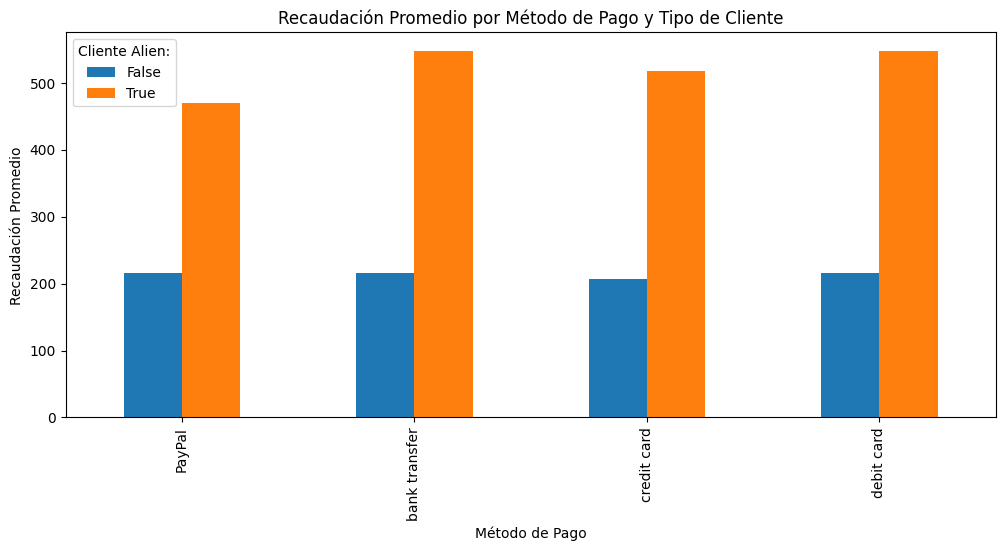

In [32]:
pivot_table = pandas_df.groupby(['Payment Method', 'Is An Alien'])['Transaction Amount'].mean().unstack()
pivot_table.plot(kind='bar', figsize=(12, 5))
plt.title('Recaudación Promedio por Método de Pago y Tipo de Cliente')
plt.xlabel('Método de Pago')
plt.ylabel('Recaudación Promedio')
plt.legend(title='Cliente Alien:')
plt.show()

El gráfico muestra la recaudación promedio por transacción para diferentes métodos de pago, diferenciando entre humanos (indicado como False en la leyenda) y alienígenas (True). Los métodos de pago incluyen Paypal, bank transfer, credit card y debit card.

Los clientes del tipo Aliens tienden a gastar mucho más en promedio que los humanos en todos los métodos de pago, llegando a doblar la recaudación promedio en todos los medios de pago, pese a esto, cabe mencionar que la recaudación es ligeremante menor en Paypal en el caso de los aliens. Por otro lado, el gasto promedio se mantiene en el mismo valor para la recaudación promedio en el consumo humano. Con esto, podemos concluir que los aliens son consumidores más lucrativos para Bodoque E-Shop, y prefieren métodos de pago como transferencia bancaria y tarjetas de débito, lo que sugiere la importancia de incentivar o facilitar estos medios para ellos.

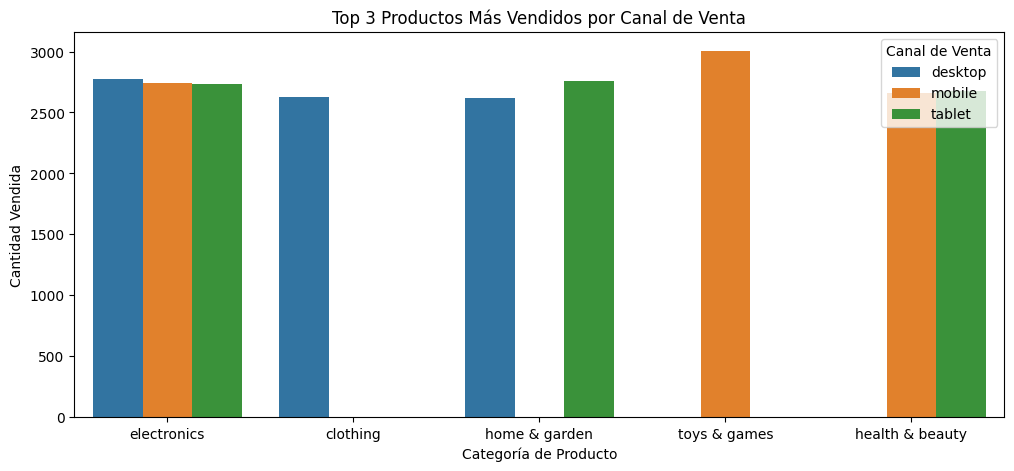

In [33]:
top_products = pandas_df.groupby(['Product Category', 'Device Used'])['Quantity'].sum().reset_index()
top_products = top_products.groupby('Device Used').apply(lambda x: x.nlargest(3, 'Quantity')).reset_index(drop=True)

plt.figure(figsize=(12, 5))
sns.barplot(data=top_products, x='Product Category', y='Quantity', hue='Device Used')
plt.title('Top 3 Productos Más Vendidos por Canal de Venta')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad Vendida')
plt.legend(title='Canal de Venta')
plt.show()

El gráfico muestra los tres productos más vendidos por canal de venta, qeu pueden ser desktop, mobile y tablet. Se observa la cantidad total de productos vendidos para cada categoría, visualizando cómo los diferentes dispositivos influyen en las ventas.

Electronics es la categoría más vendida, con una distribución equilibrada entre desktop, mobile y tablet.
Toys & games y health & beauty tienen ventas a través de mobile, mobile y tablet respectivamente, mostrando que estos productos no se comercializan comunmente en desktop.
Clothing y home & garden tienen un predominio de ventas en desktop y tablet, lo que podría indicar que los usuarios prefieren pantallas más grandes para realizar compras en estas categorías.
Con esto, se puede decir que la elección del dispositivo influye en las categorías de productos comprados, siendo mobile y tablet más efectivos en productos de entretenimiento y cuidado personal, mientras que desktop domina en ropa y hogar.

### 5. Particiones y consultas en SQL [2 puntos]

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark** (2 puntos):
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes** (Bonus: 2 punto):
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark** (Bonus: 2 punto):
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [34]:
df = df.select("*")
for col_name in df.columns:
  df = df.withColumnRenamed(col_name, col_name.replace(" ", "_"))

In [35]:
df.write.partitionBy("Is_An_Alien", "Payment_Method").saveAsTable("cred_tab")

In [36]:
spark.sql(
    "select * from cred_tab"
).show(10)

+--------------------+--------------------+------------------+-------------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+----------------+----------------+------------------+-----------------+----------------+-----------+--------------+
|      Transaction_ID|         Customer_ID|Transaction_Amount|   Transaction_Date|Product_Category|Quantity|Customer_Age|Customer_Location|Device_Used|     IP_Address|    Shipping_Address|     Billing_Address|Account_Age_Days|Transaction_Hour|    Transaction_bp|Transaction_Month|Type_of_purchase|Is_An_Alien|Payment_Method|
+--------------------+--------------------+------------------+-------------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+----------------+----------------+------------------+-----------------+----------------+-----------+--------------+
|be5f78d9-2be3-43d...|ae3

In [37]:
spark.sql("""
SELECT
  Customer_ID, SUM(Quantity) AS TOTAL
FROM cred_tab
GROUP BY Customer_ID
ORDER BY TOTAL DESC
LIMIT 10
""").show()

+--------------------+-----+
|         Customer_ID|TOTAL|
+--------------------+-----+
|ddfbe502-d51c-4ac...|    5|
|2f3d5b31-bd85-4d7...|    5|
|e91ebafd-1925-400...|    5|
|ebf10b43-2999-4fa...|    5|
|6300f942-b86d-433...|    5|
|6def79d9-fb71-415...|    5|
|62b1ce0c-5495-43e...|    5|
|ddb1eedb-78a7-403...|    5|
|447b6447-464c-400...|    5|
|a76f00f5-8493-41b...|    5|
+--------------------+-----+



In [38]:
spark.sql("""
SELECT
    Transaction_ID,
    Customer_ID,
    Transaction_Date,
    MAX(Transaction_Amount) OVER (
        PARTITION BY Customer_ID
        ORDER BY Transaction_Date
        RANGE BETWEEN INTERVAL '3 MONTH' PRECEDING AND CURRENT ROW
    ) AS max_monto
FROM cred_tab
""").show()

+--------------------+--------------------+-------------------+---------+
|      Transaction_ID|         Customer_ID|   Transaction_Date|max_monto|
+--------------------+--------------------+-------------------+---------+
|5c49573e-73e2-48f...|0005f674-821d-4c4...|2021-02-08 00:00:00|   107.11|
|bf69ec71-c390-4b2...|000695ce-4310-416...|2019-12-26 00:00:00|   689.58|
|e57d6fe8-3161-49a...|0010bfa7-d3b5-442...|2024-04-17 00:00:00|   130.74|
|adba0013-de2a-426...|001341a1-ce95-4f6...|2022-10-05 00:00:00|   222.59|
|d49cd115-ab33-494...|0013653b-9ed4-4fa...|2022-07-16 00:00:00|   749.29|
|0cff2a44-43a0-430...|0027a40f-9d45-422...|2022-02-09 00:00:00|    84.59|
|ade9d3cb-4c97-453...|0028d9e7-55bf-4e6...|2021-03-10 00:00:00|   221.28|
|f81cb748-33d3-433...|002a2b79-e86c-478...|2019-03-08 00:00:00|   331.93|
|cccf5fbb-0ba0-4b6...|0034597d-5db9-4ef...|2019-01-21 00:00:00|   221.23|
|aa2859e2-7114-44f...|0035807b-8ab5-4f8...|2019-02-11 00:00:00|   175.59|
|4d5aec02-a9f3-4af...|0037cc7b-fb0b-43

### 6. UDF [12 puntos]

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col1, col2, col3, col4):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función. (1 punto)
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad. (1 punto)
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito. (6 puntos)
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado. (2 punto)
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf? (2 puntos)

In [39]:
import pickle

with open('object.pkl', 'rb') as file:
    pkl_file = pickle.load(file)

print(pkl_file)

LogisticRegression(random_state=0)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning:

Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



El obejto cargado es un modelo de regresión logística, lo que es un clasificador.

In [40]:
dir(pkl_file)

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'intercept_

In [41]:
help(pkl_file)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

Según la información otorgada por dir y help, el método .predict_proba() predice la probabilidad de cada clase para cada X usado como input.

In [42]:
# Código Aquí
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def get_fraud_prob(col1, col2, col3, col4):
    cols = [col1, col2, col3, col4]
    probs = pkl_file.predict_proba([cols])
    return float(probs[0][1])


udf_function = udf(get_fraud_prob, FloatType())

In [43]:
predicted = df.withColumn("prediction", udf_function(df['Transaction_Amount'], df['Quantity'], df['Customer_Age'], df['Transaction_Hour']))
predicted.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+-----------+
|      Transaction_ID|         Customer_ID|Transaction_Amount|   Transaction_Date|Payment_Method|Product_Category|Quantity|Customer_Age|Customer_Location|Device_Used|     IP_Address|    Shipping_Address|     Billing_Address|Is_An_Alien|Account_Age_Days|Transaction_Hour|    Transaction_bp|Transaction_Month|Type_of_purchase| prediction|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+--

In [44]:
spark.stop()

- Usar funciones UDF permite ejecutar mediante computación distribuida distintas operaciones definidas acorde a las necesidades del usuario, en este caso de realiza operaciones sobre columnas, extendiendo así las funcionalidades que Spark provee nativamente, manteniendo la paralelización de las operaciones, es decir, siendo aún eficiente ante grandes volúmenes de datos.